<a href="https://colab.research.google.com/github/Ketanmah18/ML-PROJECTS-/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock_Price_Predictor**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import yfinance as yf


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")

print("Path to dataset files:", path)

100%|██████████| 522M/522M [00:03<00:00, 179MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2


In [3]:
stock = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
stock.head()


/tmp/ipython-input-3096246694.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341888,40.351258,39.639313,39.850088,102223600
2018-01-03,40.334854,40.878181,40.271625,40.405112,118071600
2018-01-04,40.522224,40.625269,40.299743,40.407469,89738400
2018-01-05,40.983574,41.070224,40.526901,40.618235,94640000
2018-01-08,40.831352,41.126433,40.732989,40.831352,82271200


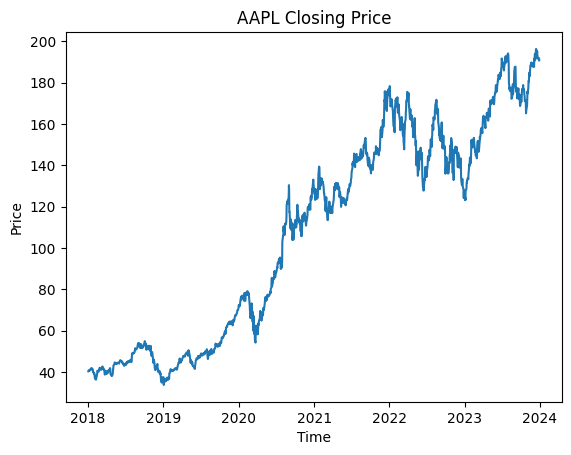

In [4]:
plt.plot(stock['Close'])
plt.title("AAPL Closing Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


In [5]:
stock['Day'] = np.arange(len(stock))


In [6]:
X = stock[['Day']]   # input
y = stock['Close']   # output


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


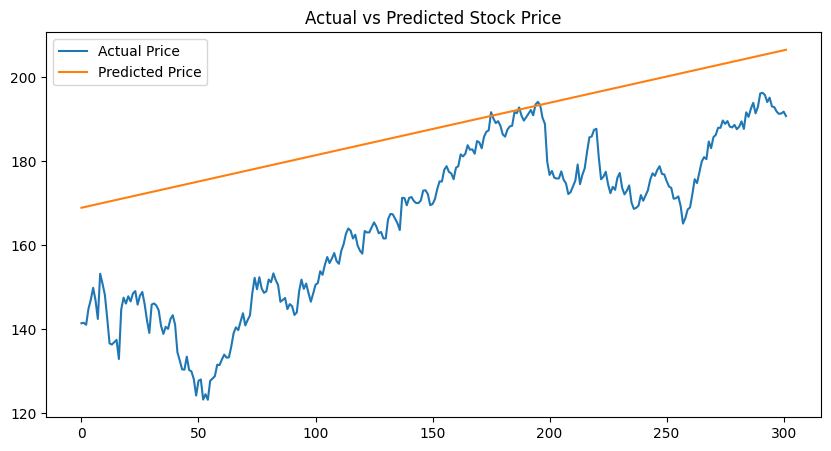

In [10]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Stock Price")
plt.show()


In [11]:
score = model.score(X_test, y_test)
print("Model Accuracy (R² Score):", score)


Model Accuracy (R² Score): -0.6467954066332846


In [12]:
future_days = np.arange(len(stock), len(stock) + 10).reshape(-1, 1)
future_price = model.predict(future_days)

print("Predicted prices for next 10 days:")
print(future_price)


Predicted prices for next 10 days:
[[206.62859415]
 [206.75355421]
 [206.87851427]
 [207.00347433]
 [207.12843439]
 [207.25339445]
 [207.37835451]
 [207.50331457]
 [207.62827463]
 [207.75323469]]
